<a href="https://colab.research.google.com/github/KhangTran2503/CS106.K21.KHTN/blob/master/Gym_Q_Learning_and_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Q-Learning & SARSA**

In [2]:
import numpy as np
import gym
env = gym.make('FrozenLake-v0')

In [3]:
def q_learning(env, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.9, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.00005, tracking=False):
    # Initialize Q(s,a) table
    q_values = np.zeros((env.observation_space.n, env.action_space.n))

    history_rewards = []

    # Train the agent by playing multiple episodes and gain experience
    for episode in range(num_training_episodes):
        # Reset the environment and get the starting state
        state = env.reset()
        done = False
        total_reward = 0

        # If epsilon_decay_rate is 0.0, the value of epsilon is fixed at its starting value
        if epsilon_decay_rate == 0.0:
            epsilon = epsilon_start
        else:
            epsilon = epsilon_min + (epsilon_start - epsilon_min)*np.exp(-epsilon_decay_rate*episode)
        
        # Play one episode
        while not done:
            # Choose an action following an epsilon-greedy policy
            if np.random.uniform(0,1) < epsilon:
                action = np.random.randint(env.action_space.n)
            else:
                action = np.argmax(q_values[state])
            
            # Take the chosen action and observe the experience
            next_state, reward, done, info = env.step(action)

            # Use the observation to update Q(s,a)
            q_values[state,action] = (1-alpha)*q_values[state,action] + alpha*(reward + gamma * np.max(q_values[next_state]))

            total_reward += reward

            state = next_state

        # After every validation_interval episode, we evaluate the policy obtained so far
        # by using it to play 1000 games and computing the average reward.
        if (episode % validation_interval) == 0:
            avg_reward = play_multiple_times(env, q_values, num_validation_episodes=1000)
            history_rewards.append(avg_reward)
            if tracking:
                print('Episode: {} - epsilon: {} - average reward: {}'.format(episode, epsilon, avg_reward))

    return q_values, history_rewards

In [4]:
def sarsa(env, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.9, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.00005, tracking=False):
    # Initialize Q(s,a) table
    q_values = np.zeros((env.observation_space.n, env.action_space.n))

    history_rewards = []

    # Train the agent by playing multiple episodes and gain experience
    for episode in range(num_training_episodes):
        # If epsilon_decay_rate is 0.0, the value of epsilon is fixed at its starting value
        if epsilon_decay_rate == 0.0:
            epsilon = epsilon_start
        else:
            epsilon = epsilon_min + (epsilon_start - epsilon_min)*np.exp(-epsilon_decay_rate*episode)
        
        # Reset the environment and get the starting state
        state = env.reset()
        action = get_action(state, env, q_values, epsilon)
        done = False
        total_reward = 0

        # Play one episode
        while not done:
            # Take the chosen action and observe the experience
            next_state, reward, done, info = env.step(action)
            
            # Choose an action following an epsilon-greedy policy
            next_action = get_action(next_state, env, q_values, epsilon)

            # Use the observation to update Q(s,a)
            if done:
                q_values[state][action] += alpha * (reward  - q_values[state][action])
            else:
                q_values[state][action] += alpha * ( reward + (gamma * q_values[next_state][next_action]) - q_values[state][action])

            total_reward += reward

            state = next_state
            action = next_action
        # After every validation_interval episode, we evaluate the policy obtained so far
        # by using it to play 1000 games and computing the average reward.
        if (episode % validation_interval) == 0:
            avg_reward = play_multiple_times(env, q_values, num_validation_episodes=1000)
            history_rewards.append(avg_reward)
            if tracking:
                print('Episode: {} - epsilon: {} - average reward: {}'.format(episode, epsilon, avg_reward))

    return q_values, history_rewards

In [5]:
def get_action(state, env, q_values, epsilon):
  if np.random.uniform(0,1) < epsilon:
    return np.random.randint(env.action_space.n)
  else:
    return np.argmax(q_values[state])

In [6]:
def play_multiple_times(env, q_values, num_validation_episodes=1000):
    """
    Check the quality of the policy encoded by the Q-value table.
    Use that policy to play multiple games, and get the average reward.
    """
    all_rewards = []

    for episode in range(num_validation_episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = np.argmax(q_values[state])
            next_state, reward, done, info = env.step(action)

            episode_reward += reward
            state = next_state
            if done:
                all_rewards.append(episode_reward)
    
    return np.mean(all_rewards)

In [6]:
#It does not guarantee to find the best policy with just one run
print('Testing Q-Learning...')
q_values, history_rewards = q_learning(env, num_training_episodes=20001, 
           validation_interval=1000, alpha=0.05, gamma=0.95, 
           epsilon_start=0.15, epsilon_min=0.01, epsilon_decay_rate=0.0,
           tracking=True)

Testing Q-Learning...
Episode: 0 - epsilon: 0.15 - average reward: 0.0
Episode: 1000 - epsilon: 0.15 - average reward: 0.0
Episode: 2000 - epsilon: 0.15 - average reward: 0.0
Episode: 3000 - epsilon: 0.15 - average reward: 0.257
Episode: 4000 - epsilon: 0.15 - average reward: 0.561
Episode: 5000 - epsilon: 0.15 - average reward: 0.14
Episode: 6000 - epsilon: 0.15 - average reward: 0.745
Episode: 7000 - epsilon: 0.15 - average reward: 0.615
Episode: 8000 - epsilon: 0.15 - average reward: 0.708
Episode: 9000 - epsilon: 0.15 - average reward: 0.708
Episode: 10000 - epsilon: 0.15 - average reward: 0.649
Episode: 11000 - epsilon: 0.15 - average reward: 0.624
Episode: 12000 - epsilon: 0.15 - average reward: 0.716
Episode: 13000 - epsilon: 0.15 - average reward: 0.604
Episode: 14000 - epsilon: 0.15 - average reward: 0.725
Episode: 15000 - epsilon: 0.15 - average reward: 0.634
Episode: 16000 - epsilon: 0.15 - average reward: 0.634
Episode: 17000 - epsilon: 0.15 - average reward: 0.635
Episode:

In [7]:
print('Testing Sarsa...')
q_values, history_rewards = sarsa(env, num_training_episodes=20001, 
           validation_interval=1000, alpha=0.1, gamma=0.95, 
           epsilon_start=0.15, epsilon_min=0.01, epsilon_decay_rate=0.0,
           tracking=True)

Testing Sarsa...
Episode: 0 - epsilon: 0.15 - average reward: 0.0
Episode: 1000 - epsilon: 0.15 - average reward: 0.0
Episode: 2000 - epsilon: 0.15 - average reward: 0.0
Episode: 3000 - epsilon: 0.15 - average reward: 0.0
Episode: 4000 - epsilon: 0.15 - average reward: 0.0
Episode: 5000 - epsilon: 0.15 - average reward: 0.0
Episode: 6000 - epsilon: 0.15 - average reward: 0.0
Episode: 7000 - epsilon: 0.15 - average reward: 0.0
Episode: 8000 - epsilon: 0.15 - average reward: 0.0
Episode: 9000 - epsilon: 0.15 - average reward: 0.615
Episode: 10000 - epsilon: 0.15 - average reward: 0.664
Episode: 11000 - epsilon: 0.15 - average reward: 0.744
Episode: 12000 - epsilon: 0.15 - average reward: 0.612
Episode: 13000 - epsilon: 0.15 - average reward: 0.658
Episode: 14000 - epsilon: 0.15 - average reward: 0.211
Episode: 15000 - epsilon: 0.15 - average reward: 0.155
Episode: 16000 - epsilon: 0.15 - average reward: 0.148
Episode: 17000 - epsilon: 0.15 - average reward: 0.259
Episode: 18000 - epsilon

In [7]:
def perform_q_learning_multiple_times(env, num_times=100, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.95, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.0):
    """
    If we run an algorithm with some hyperparameter settings only once, 
    its success or failure can be merely due to chance.
    To verify more accurately the performance of an algorithm and its certain hyperparameter settings,
    we need to run the algorithm with such hyperparameter settings multiple times.
    """
    all_history = []
    print('-----------------')
    print('Running Q-Learning...')
    for i in range(num_times):
        print('Run {}'.format(i))
        q_values, history_reward = q_learning(env, num_training_episodes, validation_interval, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay_rate, tracking=False)
        all_history.append(history_reward)
    
    mean_reward = np.array(all_history)
    mean_reward = np.mean(mean_reward, axis=0)
    mean_reward = np.vstack((np.arange(num_training_episodes, step=validation_interval),mean_reward))
    return mean_reward

In [8]:
def perform_sarsa_multiple_times(env, num_times=100, num_training_episodes=20001, validation_interval=1000, alpha=0.01, gamma=0.95, epsilon_start=0.1, epsilon_min=0.01, epsilon_decay_rate=0.0):
    """
    If we run an algorithm with some hyperparameter settings only once, 
    its success or failure can be merely due to chance.
    To verify more accurately the performance of an algorithm and its certain hyperparameter settings,
    we need to run the algorithm with such hyperparameter settings multiple times.
    """
    all_history = []
    print('-----------------')
    print('Running sarsa...')
    for i in range(num_times):
        print('Run {}'.format(i))
        q_values, history_reward = sarsa(env, num_training_episodes, validation_interval, alpha, gamma, epsilon_start, epsilon_min, epsilon_decay_rate, tracking=False)
        all_history.append(history_reward)
    
    mean_reward = np.array(all_history)
    mean_reward = np.mean(mean_reward, axis=0)
    mean_reward = np.vstack((np.arange(num_training_episodes, step=validation_interval),mean_reward))
    return mean_reward

Chạy **20000 episodes 20 times** cho thuật toán Q-Learning & SARSA.



In [10]:
# Let's try all algorithms with epsilon-greedy having a small fixed epsilon value
mean_reward_small_epsilon_q_learning = perform_q_learning_multiple_times(env, num_times=20,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.05,
                                                  gamma=0.95,
                                                  epsilon_start=0.15,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.0
                                                  )

mean_reward_small_epsilon_sarsa = perform_sarsa_multiple_times(env, num_times=20,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.05,
                                                  gamma=0.95,
                                                  epsilon_start=0.15,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.0
                                                  )



-----------------
Running Q-Learning...
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
-----------------
Running sarsa...
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19


In [11]:
# Let's try all algorithms with epsilon-greedy having a small fixed epsilon value
mean_reward_epsilon_decay_q_learning = perform_q_learning_multiple_times(env, num_times=20,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.05,
                                                  gamma=0.95,
                                                  epsilon_start=0.7,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.00015
                                                  )

mean_reward_epsilon_decay_sarsa = perform_sarsa_multiple_times(env, num_times=20,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.05,
                                                  gamma=0.95,
                                                  epsilon_start=0.7,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.00015
                                                  )



-----------------
Running Q-Learning...
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
-----------------
Running sarsa...
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

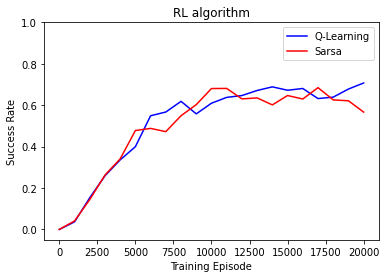

In [17]:
plt.title('RL algorithm')
plt.xlabel('Training Episode')
plt.ylabel('Success Rate')
plt.ylim([-0.05,1])
plt.plot(mean_reward_small_epsilon_q_learning[0],mean_reward_small_epsilon_q_learning[1], 'b-', label='Q-Learning')
plt.plot(mean_reward_small_epsilon_sarsa[0], mean_reward_small_epsilon_sarsa[1], 'r-', label='Sarsa')
plt.legend()

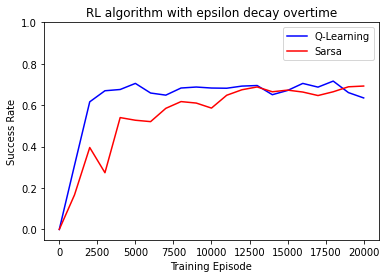

In [18]:
plt.title('RL algorithm with epsilon decay overtime')
plt.xlabel('Training Episode')
plt.ylabel('Success Rate')
plt.ylim([-0.05,1])
plt.plot(mean_reward_epsilon_decay_q_learning[0],mean_reward_epsilon_decay_q_learning[1], 'b-', label='Q-Learning')
plt.plot(mean_reward_epsilon_decay_sarsa[0], mean_reward_epsilon_decay_sarsa[1], 'r-', label='Sarsa')
plt.legend()

Trong decayed epsilon, **Q-Learning** có vẻ chạy tốt hơn các thuật toán còn lại, nhưng sự chênh lệch là không nhiều lắm.


###**Hyperparameters:**
> **num_times** = 20
>
> **num_training_episodes** = 20001
>
> **validation_interval** = 1000
>
> **alpha** = 0.06
>                                                  
> **gamma** = 0.955
>
> **epsilon_start** = 0.7
>
> **epsilon_min** = 0.01
>
> **epsilon_decay_rate** = 0.00015
                                                  

In [15]:
mean_reward_custom_q_learning = perform_q_learning_multiple_times(env, num_times=20,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.06,
                                                  gamma=0.955,
                                                  epsilon_start=0.7,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.00015
                                                  )

mean_reward_custom_sarsa = perform_sarsa_multiple_times(env, num_times=20,
                                                  num_training_episodes=20001,
                                                  validation_interval=1000,
                                                  alpha=0.06,
                                                  gamma=0.955,
                                                  epsilon_start=0.7,
                                                  epsilon_min=0.01,
                                                  epsilon_decay_rate=0.00015
                                                  )


-----------------
Running Q-Learning...
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
-----------------
Running sarsa...
Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19


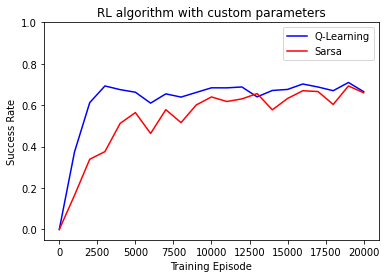

In [17]:
# It seems that Q-Learning has the best learning curve
plt.title('RL algorithm with custom parameters')
plt.xlabel('Training Episode')
plt.ylabel('Success Rate')
plt.ylim([-0.05,1])
plt.plot(mean_reward_custom_q_learning[0],mean_reward_custom_q_learning[1], 'b-', label='Q-Learning')
plt.plot(mean_reward_custom_sarsa[0], mean_reward_custom_sarsa[1], 'r-', label='Sarsa')
plt.legend()

Sau khi thay đổi parameter thì **SARSA** có vẻ hội tụ nhanh hơn so với ban đầu. Nhưng trong bài toán này **Q-Learning** vẫn là lựa chọn tốt nhất.